# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![Dataset Overview](./pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

dir='.'

### training data
anger_train = pd.read_csv(f"{dir}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{dir}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{dir}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{dir}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv(f"{dir}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{dir}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{dir}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{dir}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


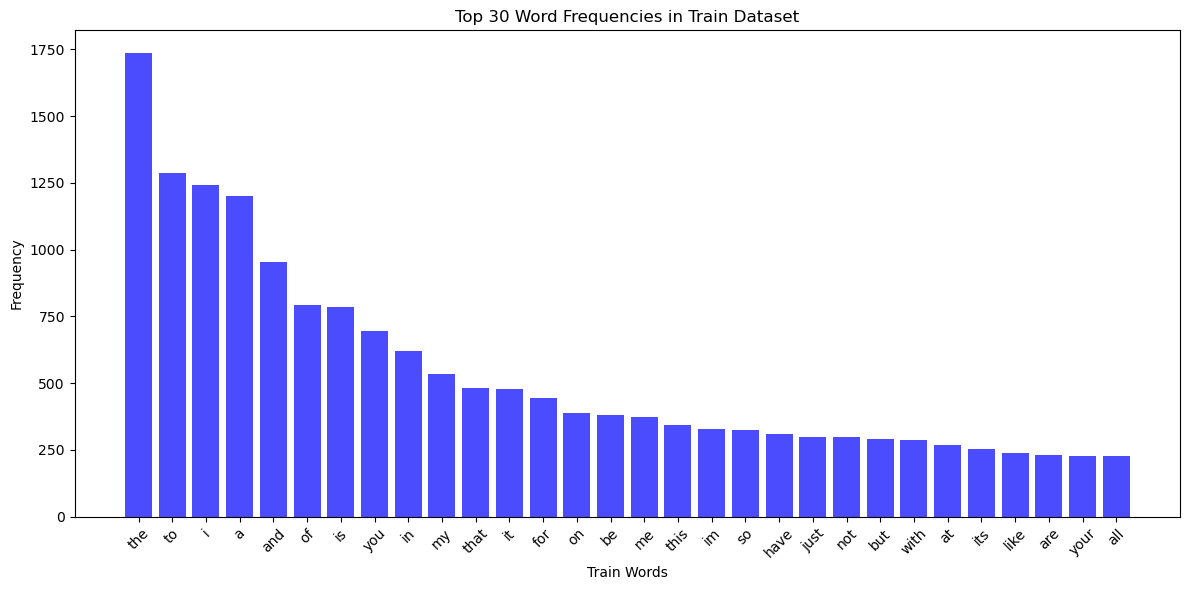

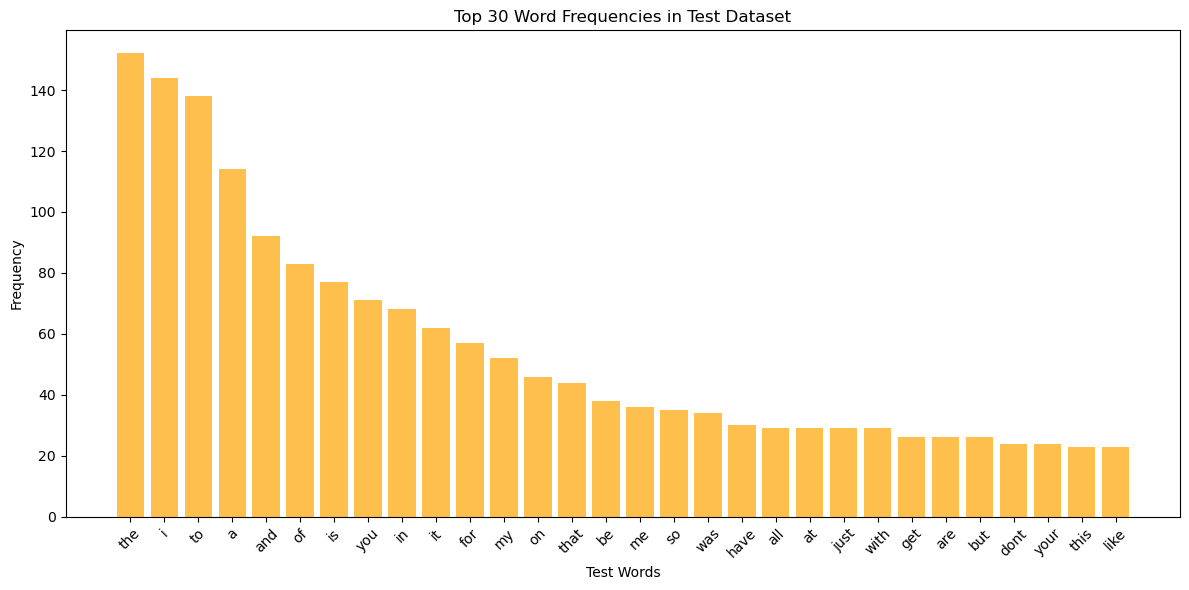

In [6]:
# Answer here
import re
from matplotlib import pyplot as plt
def preprocess_text(text):
    text = text.lower()  #
    text = re.sub(r"[^\w\s]", "", text)
    words = text.split()
    return words

all_words_train = []
for text in train_df['text']:
    all_words_train.extend(preprocess_text(text))

all_words_test = []
for text in test_df['text']:
    all_words_test.extend(preprocess_text(text))

combined_df=pd.DataFrame()
all_words_train_count=pd.Series(all_words_train).value_counts().head(30)
all_words_test_count=pd.Series(all_words_test).value_counts().head(30)
combined_df = pd.DataFrame({
    "train_word": all_words_train_count.index,
    "train_count": all_words_train_count.values,
    "test_word": all_words_test_count.index,
    "test_count": all_words_test_count.values,
})

plt.figure(figsize=(12, 6))
plt.bar(combined_df['train_word'], combined_df['train_count'], alpha=0.7, color='blue')
plt.xlabel('Train Words')
plt.ylabel('Frequency')
plt.title('Top 30 Word Frequencies in Train Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Test dataset word frequency plot
plt.figure(figsize=(12, 6))
plt.bar(combined_df['test_word'], combined_df['test_count'], alpha=0.7, color='orange')
plt.xlabel('Test Words')
plt.ylabel('Frequency')
plt.title('Top 30 Word Frequencies in Test Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [8]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

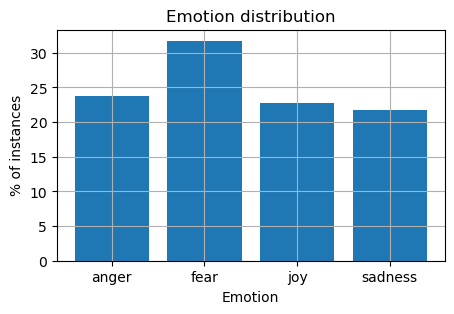

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [13]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [14]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [16]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [17]:
"😂" in feature_names

False

In [18]:
import os

In [19]:
os.getcwd()

'd:\\school\\DM2024-Lab2-Master'

Let's try using another tokenizer below.

In [20]:
import nltk
nltk.data.path.append(os.getcwd())
nltk.download('punkt', download_dir=os.getcwd())
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to
[nltk_data]     d:\school\DM2024-Lab2-Master...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\123321\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [6, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

In [24]:
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [25]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
# Build TF-IDF vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=word_tokenize)

# Fit and transform training data
TFIDF_vectorizer.fit(train_df['text'])
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])

# Check feature names
tfidf_feature_names = TFIDF_vectorizer.get_feature_names_out()
tfidf_feature_names[100:110]



array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [27]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'fear', 'anger', 'sadness', 'joy', 'anger',
       'fear', 'anger', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [28]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [29]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [30]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [31]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

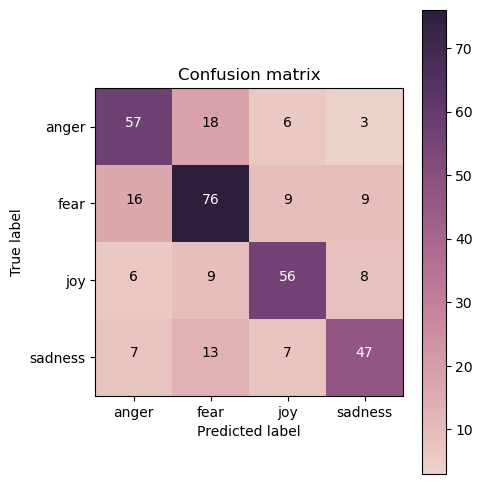

In [32]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [33]:
# Answer here
# 1.
# Training Accuracy: 99% indicates that the model performs almost perfectly on the training dataset
# However, Testing Accuracy: 68% indicating it has not generalized well to unseen data.
# 2.
# Anger: Precision = 0.66, Recall = 0.68, F1-Score = 0.67
# The model performs moderately well in identifying "anger" but makes some false predictions for this class.
# Fear: Precision = 0.66, Recall = 0.69, F1-Score = 0.67
# Slightly better than "anger," but still some false positives and false negatives occur.
# Joy: Precision = 0.72, Recall = 0.71, F1-Score = 0.71
# "Joy" has the highest precision and recall, suggesting it is the easiest emotion for the model to classify correctly.
# Sadness: Precision = 0.70, Recall = 0.64, F1-Score = 0.67
# "Sadness" has decent precision but lower recall, meaning it often misses true "sadness" instances.

# 3. Confusion Matrix
# For "anger":
# 57 instances were correctly classified as "anger."
# 18 were incorrectly classified as "fear."
# Misclassifications suggest confusion between "anger" and "fear."
# For "fear":
# 76 instances were correctly classified as "fear."
# Misclassifications include 16 as "anger," indicating some overlap between these emotions.
# For "joy":
# 56 instances were correctly classified.
# Some were misclassified as "fear" and "sadness."
# For "sadness":
# 47 instances were correctly classified.
# Significant misclassifications as "fear" (13) and "anger" (7).

# The model performs best for the "joy" class, likely due to distinct patterns in the data for this emotion.
# The model struggles with "sadness" and "fear," as these emotions may have overlapping features in the text data.
# Overfitting is evident, as indicated by the large gap between training and testing accuracy.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [34]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()

# Train the model
NB_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# Evaluate the model
# Accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {acc_train:.2f}')
print(f'Testing Accuracy: {acc_test:.2f}')

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)



Training Accuracy: 0.79
Testing Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [35]:
# Answer here
# Using the Naive Bayes model, we achieved the following results:
# Training accuracy: 79%, Testing accuracy: 70%.
# This suggests that the Naive Bayes model is less overfitted and generalizes better to the test data.

# The Naive Bayes model demonstrates a more balanced performance across all classes.
# "Fear" and "Joy" maintain relatively high precision and recall,
# indicating that these emotions are easier for the model to classify correctly.

# Decision Trees split data using thresholds that maximize class separation at each step
# making them effective for capturing complex decision boundaries
# however, without constraints (e.g., max_depth), Decision Trees tend to overfit
# especially with small training sets or noisy data.

# Naive Bayes relies on the conditional independence assumption
# which simplifies the classification process by assuming that features are independent
# This makes it computationally efficient and robust to small datasets

# While Naive Bayes avoids overfitting and achieves better generalization
# it may oversimplify the problem, resulting in slightly lower performance on some classes (e.g., "Joy")

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Dataset Overview](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [36]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [37]:
import keras

In [38]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [39]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2975    sadness
351       anger
1001       fear
607       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [40]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Dataset Overview](./pics/pic2.png)

In [41]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [42]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(f'{dir}/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.3166 - accuracy: 0.3878 - val_loss: 1.2767 - val_accuracy: 0.4899
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9545 - accuracy: 0.6590 - val_loss: 0.8891 - val_accuracy: 0.6801
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7980 - val_loss: 0.8074 - val_accuracy: 0.6830
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8478 - val_loss: 0.7938 - val_accuracy: 0.7118
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8832 - val_loss: 0.8165 - val_accuracy: 0.6830
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2696 - accuracy: 0.9070 - val_loss: 0.8906 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9233 - val_loss: 0.9112 - val_accuracy: 0.6916
Epoch 

### 6.5 Predict on testing data

In [43]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[9.73758459e-01, 6.39971113e-03, 2.45993678e-03, 1.73817668e-02],
       [6.32891158e-07, 8.81591191e-08, 9.99999046e-01, 2.97358042e-07],
       [2.32447965e-05, 7.71769822e-01, 4.12731990e-03, 2.24079594e-01],
       [3.90280783e-01, 1.22304894e-02, 5.84736824e-01, 1.27519695e-02],
       [2.28142053e-05, 6.62221666e-03, 6.74878189e-04, 9.92680073e-01]],
      dtype=float32)

In [44]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'fear', 'joy', 'sadness'], dtype=object)

In [45]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [46]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(f"{dir}/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.387766,1.316638,0.489914,1.276651
1,1,0.659009,0.954509,0.680115,0.889133
2,2,0.797952,0.572356,0.682997,0.807427
3,3,0.847772,0.415400,0.711816,0.793785
4,4,0.883200,0.328927,0.682997,0.816510
5,5,0.907003,0.269558,0.671470,0.890610
6,6,0.923332,0.225992,0.691643,0.911171
7,7,0.935234,0.190948,0.680115,1.033803
8,8,0.950733,0.166860,0.691643,1.061377
9,9,0.959590,0.140403,0.685879,1.135508


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![Dataset Overview](./pics/pic3.png)


![Dataset Overview](./pics/pic4.png)

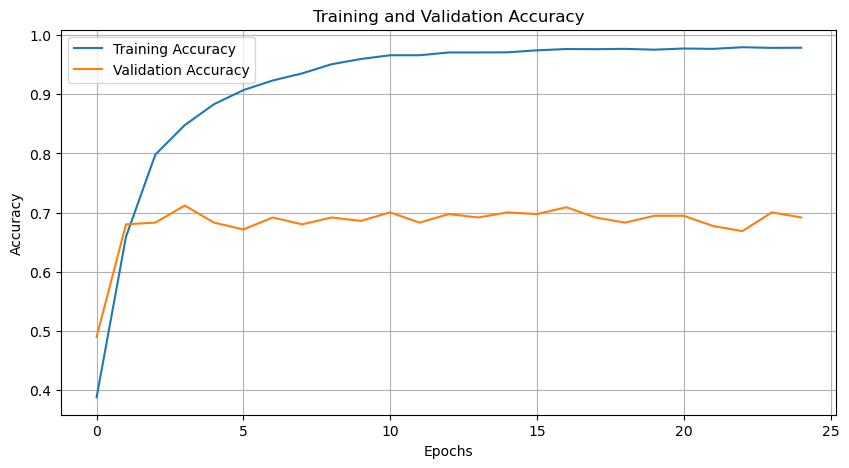

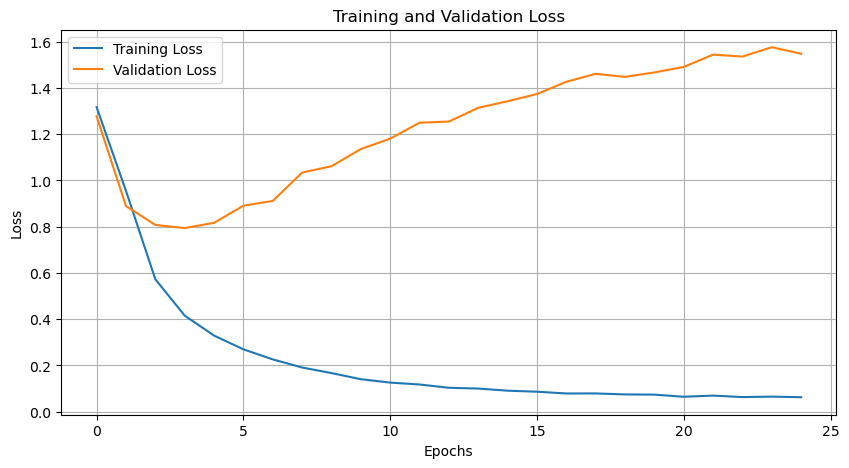

'The validation accuracy initially improves but begins to plateau and slightly decrease around epoch 10,\nnever exceeding approximately 68%. This indicates that the model is overfitting:\nit performs exceedingly well on the training data but struggles to generalize to unseen validation data.'

In [47]:
# Answer here
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

'''The validation accuracy initially improves but begins to plateau and slightly decrease around epoch 10,
never exceeding approximately 68%. This indicates that the model is overfitting:
it performs exceedingly well on the training data but struggles to generalize to unseen validation data.'''

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [48]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2975,40148,@CNN yes. Too many cops. And too many ppl who ...,"[@, CNN, yes, ., Too, many, cops, ., And, too,..."
351,10351,@TillTheEndMMVI I accidetly dumped boiling wat...,"[@, TillTheEndMMVI, I, accidetly, dumped, boil..."
1001,20144,@Budget car rental you have made realize why ...,"[@, Budget, car, rental, you, have, made, real..."
607,10607,@UnknownAndYoung — a low growl escaping him. O...,"[@, UnknownAndYoung, —, a, low, growl, escapin..."
1892,21035,The radio just told me Lady GaGa is going coun...,"[The, radio, just, told, me, Lady, GaGa, is, g..."


In [49]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'CNN', 'yes', '.', 'Too', 'many', 'cops', '.', 'And', 'too', 'many', 'ppl', 'who', 'should', 'have', 'lost', 'their', 'lives', 'r', 'still', 'alive', '.']),
       list(['@', 'TillTheEndMMVI', 'I', 'accidetly', 'dumped', 'boiling', 'water', 'my', 'myself', '😫']),
       list(['@', 'Budget', 'car', 'rental', 'you', 'have', 'made', 'realize', 'why', 'I', 'always', 'use', '@', 'nationalcares', '!', '!', '!', '!', 'What', 'a', '#', 'nightmare', '!', '!', '#', 'disgusted'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [50]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [51]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.5349063 ,  0.18904999, -0.00997998,  0.49841905,  0.03164679,
       -1.3775834 ,  0.7766546 ,  1.3534648 , -0.46179312, -1.0117984 ,
       -0.47330576, -0.85295266, -0.7344514 ,  0.6518998 ,  0.10975093,
       -0.28931704,  0.04801757, -0.48036408,  0.11208061, -0.92621547,
        0.41944164,  0.6139344 ,  0.44282877,  0.11177742,  0.33022732,
        0.108059  , -0.35934538,  0.55680394, -0.7049209 , -0.14216207,
        0.5925887 , -0.21641907,  0.61559314, -0.48164034, -0.00980913,
       -0.0595425 ,  0.49356478, -0.08867939, -0.21532984, -0.8008098 ,
       -0.13035361,  0.13297626, -0.26993647,  0.34537613,  0.7702056 ,
       -0.22769347, -0.77710414, -0.22872484,  0.6544502 ,  0.5310027 ,
       -0.04876334, -0.5469799 , -0.3732001 , -0.28766602, -0.4446935 ,
       -0.1143992 ,  0.00675528,  0.27823758, -0.18460582,  0.18170732,
       -0.17412782, -0.0597061 ,  0.5923286 , -0.01717739, -0.8111549 ,
        0.6257455 ,  0.0819337 ,  0.73888165, -1.4101914 ,  0.47

In [52]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9363282918930054),
 ('Makes', 0.9249094128608704),
 ('blessed', 0.9204970002174377),
 ('bday', 0.9197599291801453),
 ('Be', 0.913170576095581),
 ('help', 0.9083749651908875),
 ('keeping', 0.9064867496490479),
 ('ampalaya', 0.9028218388557434),
 ('cats', 0.9017587900161743),
 ("'you", 0.9016640186309814)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [53]:
import requests
import os
# # Define the Hugging Face file URL
# file_url = "https://huggingface.co/LoganKilpatrick/GoogleNews-vectors-negative300/resolve/main/GoogleNews-vectors-negative300.bin.gz"
# output_path = "./GoogleNews/GoogleNews-vectors-negative300.bin.gz"

# # Ensure the destination directory exists
# os.makedirs(os.path.dirname(output_path), exist_ok=True)

# # Download the file
# response = requests.get(file_url, stream=True)
# with open(output_path, "wb") as f:
#     for chunk in response.iter_content(chunk_size=8192):
#         if chunk:  # Filter out keep-alive chunks
#             f.write(chunk)

print("Download complete!")


Download complete!


In [54]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [55]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [56]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [57]:
# Answer here
import numpy as np

def sentence_to_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Example
sentence = "DM 2024 lab 2 master .ipynb"
sentence_vector = sentence_to_vector(sentence, w2v_google_model)
sentence_vector

array([-9.53369141e-02, -1.27258301e-02,  6.03942871e-02,  6.42299652e-02,
        1.44042969e-02,  6.29425049e-05, -5.74340820e-02, -1.00952148e-01,
       -5.12084961e-02, -9.33227539e-02,  7.14111328e-03, -1.18881226e-01,
       -3.97949219e-02, -1.42700195e-01, -1.65527344e-01,  7.78808594e-02,
       -4.90417480e-02,  1.91345215e-02,  2.14233398e-02, -1.27586365e-01,
       -1.19247437e-02,  3.07312012e-02, -1.56860352e-02,  6.37817383e-02,
        4.66308594e-02, -7.47375488e-02, -8.48388672e-02, -5.78765869e-02,
       -6.65588379e-02, -1.40686035e-02, -8.20312500e-02, -1.22558594e-01,
       -8.83789062e-02, -1.51062012e-01, -9.52148438e-02, -6.04858398e-02,
        2.57568359e-02,  1.62570000e-01,  2.96783447e-02, -2.79235840e-03,
        1.27319336e-01, -3.63464355e-02, -4.07104492e-02,  1.26953125e-01,
       -1.21398926e-01, -1.25610352e-01, -6.46972656e-02,  1.45721436e-02,
       -3.90014648e-02,  7.54547119e-02, -1.10717773e-01,  3.02734375e-02,
       -2.68554688e-02, -

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [58]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [59]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Dataset Overview](./pics/pic6.png)

In [60]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [61]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![Dataset Overview](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![Dataset Overview](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [62]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

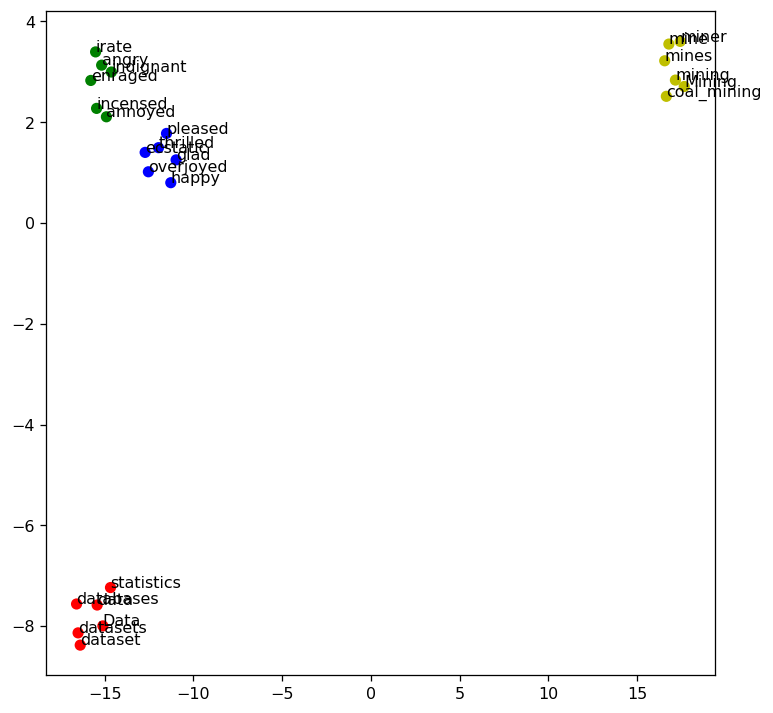

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

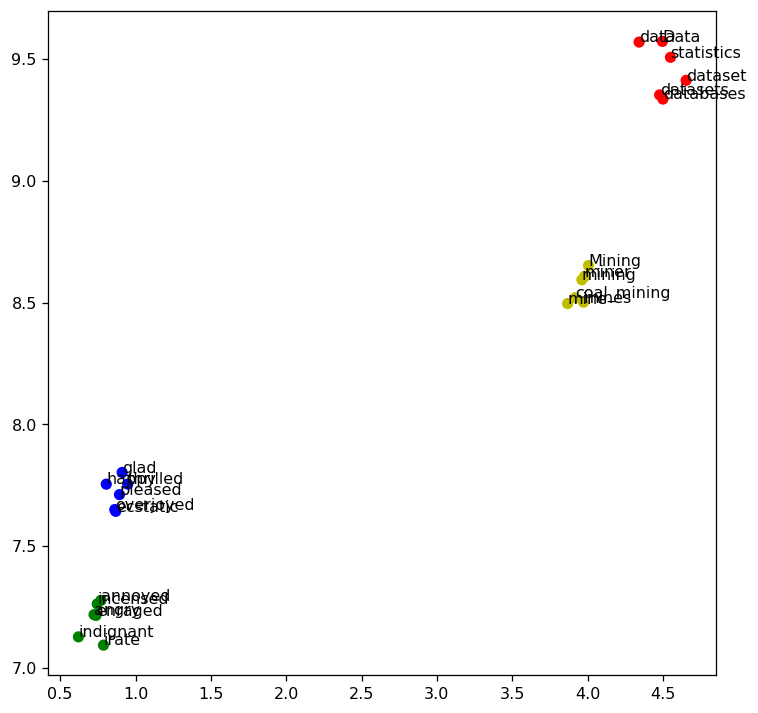

In [64]:
# !pip install umap-learn
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

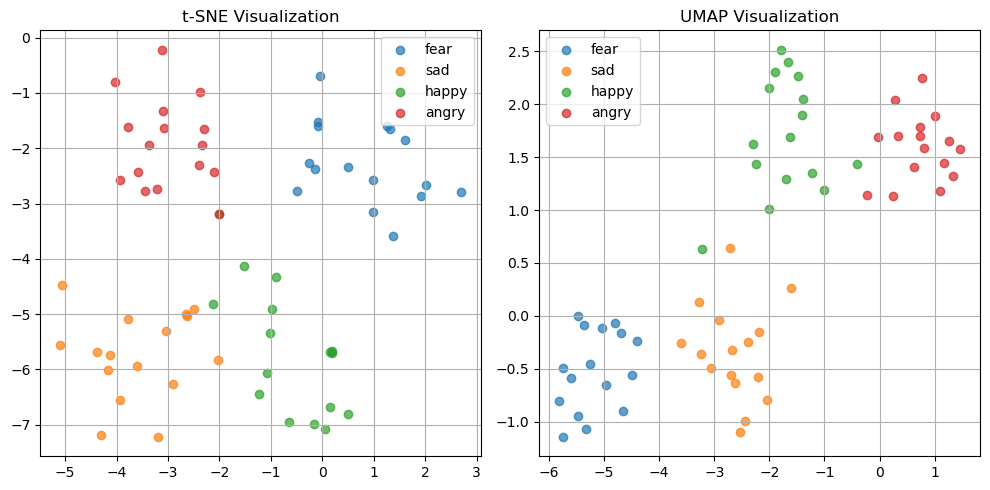

'In the t-SNE graph, the "fear" cluster is compact but isolated, and its relationship with "angry" or other emotions is unclear.\nThe "sad" and "happy" clusters overlap slightly, though this might be due to projection artifacts.\nIn the UMAP graph, the "fear" and "angry" clusters seem far from each other, suggesting potential differnce in the embeddings.'

In [65]:
# Answer here

# Get the 15 most similar words for each target word
target_words = ["angry", "happy", "sad", "fear"]
related_words = {}
for word in target_words:
    try:
        similar_words = w2v_google_model.most_similar(word, topn=15)
        related_words[word] = [w for w, _ in similar_words]
    except KeyError:
        print(f"Word '{word}' not in vocabulary.")

# Collect vectors and labels
all_words = []
all_labels = []
for key, words in related_words.items():
    all_words.extend(words)
    all_labels.extend([key] * len(words))

# Add the target words themselves
all_words.extend(target_words)
all_labels.extend(target_words)

# Fetch word vectors
word_vectors = np.array([w2v_google_model[word] for word in all_words])

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(word_vectors)

# UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_results = umap_model.fit_transform(word_vectors)

# Plot t-SNE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for label in set(all_labels):
    indices = [i for i, l in enumerate(all_labels) if l == label]
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label, alpha=0.7)
plt.title("t-SNE Visualization")
plt.legend()
plt.grid(True)

# Plot UMAP
plt.subplot(1, 2, 2)
for label in set(all_labels):
    indices = [i for i, l in enumerate(all_labels) if l == label]
    plt.scatter(umap_results[indices, 0], umap_results[indices, 1], label=label, alpha=0.7)
plt.title("UMAP Visualization")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

'''In the t-SNE graph, the "fear" cluster is compact but isolated, and its relationship with "angry" or other emotions is unclear.
The "sad" and "happy" clusters overlap slightly, though this might be due to projection artifacts.
In the UMAP graph, the "fear" and "angry" clusters seem far from each other, suggesting potential differnce in the embeddings.'''

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![Dataset Overview](./pics/pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [66]:
!pip install ollama

In [70]:
import ollama
response = ollama.chat(model='llama3.2:1b', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

# Data Mining

Data mining is the process of discovering patterns, relationships, and insights from large databases or data sets. It involves using various techniques, such as statistical modeling, machine learning algorithms, and knowledge discovery methods, to extract meaningful information from data.

## Characteristics of Data Mining

*   **Pattern discovery**: Data mining aims to identify patterns, trends, and anomalies in the data.
*   **Data preprocessing**: Preprocessing is a critical step in data mining, where data is cleaned, transformed, and prepared for analysis.
*   **Model evaluation**: Once patterns are identified, models are evaluated to determine their accuracy and relevance.

## Types of Data Mining

*   **Supervised learning**: Learning from labeled data, where the model is trained to predict a specific outcome based on input features.
*   **Unsupervised learning**: Discovering patterns and relationships in unlabeled data without prior knowledge of the outcome.
*   *

In [71]:
import requests

url = "http://127.0.0.1:11434/api/chat"
payload = {
    "model": "llama3.2:1b",
    "messages": [{"role": "user", "content": "Hello"}],
    "stream": False
}
try:
    response = requests.post(url, json=payload)
    print(response.json())
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

{'model': 'llama3.2:1b', 'created_at': '2024-12-07T10:19:54.7110132Z', 'message': {'role': 'assistant', 'content': 'How can I assist you today?'}, 'done_reason': 'stop', 'done': True, 'total_duration': 303620600, 'load_duration': 20168700, 'prompt_eval_count': 26, 'prompt_eval_duration': 3000000, 'eval_count': 8, 'eval_duration': 279000000}


**We can use the IPython library to make the response look better:**

In [72]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [73]:
from IPython.display import display, Markdown

response_data = response.json()  # 将响应解析为字典
display(Markdown(response_data['message']['content']))

How can I assist you today?


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [74]:
# Answer here
# Role user represents the user's input or question.
# Typical usage involves the user asking something or providing information.
# Example: "content": "What is the capital of France?".

# Role assistant tepresents the AI assistant's response.
# This role allows for predefined or custom assistant replies in a conversation flow.
# Example: "content": "The capital of France is Paris.".

# Role system is used to set the context, tone, or behavior of the assistant.
# Often sent as the first message to establish rules or guidelines for the AI.
# Example: "content": "You are a helpful assistant who speaks in a formal tone.".

import requests

url = "http://127.0.0.1:11434/api/chat"
payload = {
    "model": "llama3.2:1b",
    "messages": [
        {"role": "system", "content": "You are an expert engneer of machine learning."},
        {"role": "user", "content": "Can you tell me what is llm?"},
    ],
    "stream": False
}

try:
    response = requests.post(url, json=payload)
    response.raise_for_status()
    print(response.json())  # Display the response from the assistant
except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

{'model': 'llama3.2:1b', 'created_at': '2024-12-07T10:24:28.6329021Z', 'message': {'role': 'assistant', 'content': "Llama is an artificial intelligence model developed by Meta, designed to process and generate human-like language. It's a large language model that can handle various tasks, such as text completion, summarization, and even creative writing. Like other large language models, Llama uses natural language processing to generate text. It works by taking a sequence of words as input and predicting the next word to create coherent and natural-sounding text."}, 'done_reason': 'stop', 'done': True, 'total_duration': 1409169900, 'load_duration': 17826600, 'prompt_eval_count': 45, 'prompt_eval_duration': 2000000, 'eval_count': 87, 'eval_duration': 933000000}


### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![Dataset Overview](./pics/example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![Dataset Overview](./pics/example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [75]:
# import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['D:\school\DM2024-Lab2-Master\pics\example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image depicts a vibrant scene of a Shiba Inu dog in mid-jump. The dog, with its fur in shades of orange and white, has its mouth wide open as if caught in the middle of a playful bark. Its tail is held high, adding to the sense of motion captured in the image.

The background of the image provides context to the action. It features a grassy lawn that extends into the distance where trees stand tall against the sky. The dog's energetic leap stands out against this serene backdrop, creating a dynamic and lively composition.

Please note that this description is based on the details visible in the image and does not include any assumptions or interpretations beyond what can be confidently determined from the image itself.

In [76]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['D:\school\DM2024-Lab2-Master\pics\example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image presents a scene of tranquility and simplicity. At the center of the frame, a gray tabby cat stands confidently on its hind legs against a stark white background. The cat's body is angled slightly to the left, but it faces the camera directly with an expression that suggests curiosity or perhaps surprise. 

The cat's tail and back paws are raised in the air, adding to the impression of alertness or anticipation. Its front paws are firmly planted on the ground, providing a counterbalance to its elevated rear end. The cat is facing towards the camera with wide eyes that further emphasize its attentive stance.

Despite the simplicity of the scene, it's clear that this image captures a moment in time where the cat seems engaged with something off-camera, leaving us to wonder what has caught its attention. The white background serves to highlight the cat and draw our focus towards it, making it the undeniable star of this composition. 

Overall, the image is a snapshot of a quiet interaction between human and pet, frozen in time for us to appreciate. It's a simple scene, yet one that invites questions and sparks curiosity about what might be happening just out of frame.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['D:\school\DM2024-Lab2-Master\pics\pic10.png'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

"""The image presents a table that provides information on the storage capacity of various devices, specifically laptops. The data is organized in columns and rows against a black background with white text, offering a clear contrast for easy readability.

Starting from the top left corner, we have the model number "LUMA32 XS2", which occupies the entire first row. Following this, the second row is dedicated to parameters such as size and weight. The third row focuses on storage capacity in gigabytes (GB). The fourth row introduces a new parameter: download speed in megabits per second (Mbps). The fifth row presents a list of laptop models along with their respective sizes, weights, and capacities.

The data for each model is meticulously arranged in rows against the black background, making it easy to compare different models and parameters across devices. The table appears to be part of an online store listing or comparison guide, providing potential buyers with detailed specifications of various laptops available for purchase."""


"""The reason I chose pic10.png is that it contains a lot of text, and the model should recognize it and provide useful insights, but apparently, the model still has room for improvement."""


The image presents a table that provides information on the storage capacity of various devices, specifically laptops. The data is organized in columns and rows against a black background with white text, offering a clear contrast for easy readability. 

Starting from the top left corner, we have the model number "LUMA32 XS2", which occupies the entire first row. Following this, the second row is dedicated to parameters such as size and weight. The third row focuses on storage capacity in gigabytes (GB). The fourth row introduces a new parameter: download speed in megabits per second (Mbps). The fifth row presents a list of laptop models along with their respective sizes, weights, and capacities.

The data for each model is meticulously arranged in rows against the black background, making it easy to compare different models and parameters across devices. The table appears to be part of an online store listing or comparison guide, providing potential buyers with detailed specifications of various laptops available for purchase.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [80]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2:1b" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2:1b', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

According to the article, IBM has implemented LLMs at different levels to enhance their natural language understanding (NLU) and natural language processing (NLP) capabilities. Specifically, it mentions that:

1. IBM has launched its Granite model series on watsonx.ai, which uses LLMs as the generative AI backbone for other IBM products like Watsonx Assistant and Watsonx Orchestrate.
2. Watsonx Assistant is built on top of IBM's Granite model series using OpenAI's Chat GPT-3 and GPT-4 interfaces.

These are some of the related solutions or examples mentioned in the article that use LLMs, specifically from IBM.


### **Actual content in the URL:**
![Dataset Overview](./pics/pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [81]:
# Answer here
import ollama
from bs4 import BeautifulSoup
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings

llm_model = "llama3.2:1b"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(web_paths=(url,), bs_kwargs=dict())
        docs.extend(loader.load())  # Load all documents from each URL

    # Split documents into chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)

    # Generate embeddings and create a vectorstore
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

    return vectorstore.as_retriever()

# List of URLs
urls = [
    "https://www.cpc.com.tw/en/cp.aspx?n=2665",
    "https://www.cpc.com.tw/en/cp.aspx?n=2685",
    "https://www.cpc.com.tw/en/cp.aspx?n=3022"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2:1b', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

prompts = [
    "What are the key activities of CPC Corporation, Taiwan, in upstream oil and gas exploration?",
    "How does CPC Corporation, Taiwan, ensure the quality and efficiency of its refining processes?",
    "What initiatives has CPC Corporation, Taiwan, undertaken to promote green energy development and sustainability?"
]

# Execute the RAG chain for each prompt and collect the responses
responses = {}
for prompt in prompts:
    try:
        responses[prompt] = rag_chain(prompt)
    except Exception as e:
        responses[prompt] = f"Error: {e}"

# Display the results
responses

CPC Corporation, Taiwan, has taken several initiatives to promote green energy development and sustainability:

1. **Organizational and process reengineering**: CPC has implemented organizational and process reengineering efforts to improve human resource utilization and increase competitiveness.
2. **Rotating employees through different jobs and departments**: The company has formed the Sustainable Operations Promotion Committee to oversee sustainability in four major aspects, including environmental protection, social care, policy and R&D, and environmental accounting and information.
3. **Technology transfer of sustainable products**: CPC has developed or acquired several innovative products, such as Marilube (low-alkali marine motor oil), which is environmentally friendly and has contributed to the company's sustainability efforts.

These initiatives demonstrate CPC's commitment to corporate sustainability and its efforts to promote green energy development in Taiwan.


### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [82]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2:1b',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [83]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [84]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [85]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
2975,40148,@CNN yes. Too many cops. And too many ppl who ...,sadness,0.688,"[@, CNN, yes, ., Too, many, cops, ., And, too,...","[-3.9800658226013184, 4.717365264892578, 2.268..."
351,10351,@TillTheEndMMVI I accidetly dumped boiling wat...,anger,0.521,"[@, TillTheEndMMVI, I, accidetly, dumped, boil...","[-1.5584574937820435, 4.278619289398193, 0.594..."
1001,20144,@Budget car rental you have made realize why ...,fear,0.729,"[@, Budget, car, rental, you, have, made, real...","[3.2699358463287354, 5.047285556793213, 1.0048..."
607,10607,@UnknownAndYoung — a low growl escaping him. O...,anger,0.396,"[@, UnknownAndYoung, —, a, low, growl, escapin...","[-2.963304281234741, 3.6857857704162598, 2.186..."
1892,21035,The radio just told me Lady GaGa is going coun...,fear,0.246,"[The, radio, just, told, me, Lady, GaGa, is, g...","[0.41087764501571655, 4.704644203186035, -0.89..."
...,...,...,...,...,...,...
2768,30764,@BbeautifulSoul_ u always gotta attitude tho ....,joy,0.188,"[@, BbeautifulSoul_, u, always, got, ta, attit...","[-0.570004940032959, 5.813686847686768, 2.5440..."
1322,20465,Haven't gotten one hour of sleep... Today is g...,fear,0.542,"[Have, n't, gotten, one, hour, of, sleep, ...,...","[0.6932090520858765, 5.082231521606445, -0.353..."
2615,30611,Misery loves company. The church ought to be a...,joy,0.346,"[Misery, loves, company, ., The, church, ought...","[1.5492867231369019, 4.031195163726807, 3.1372..."
2523,30519,"incetown, age 23, joyful, elevated in hope wit...",joy,0.417,"[incetown, ,, age, 23, ,, joyful, ,, elevated,...","[-0.270175576210022, 1.8738933801651, -0.03579..."


In [86]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
289,40802,"[ @HedgehogDylan ] *she would frown a bit, fol...",sadness,0.562,"[-1.159415602684021, 3.3423988819122314, 1.565..."
258,30887,[Moment of levity on the B41] Baby: I want ISI...,joy,0.521,"[-2.219778060913086, 3.4517645835876465, 0.822..."
87,21150,@1johndes ball watching &amp; Rojo'd header wa...,fear,0.475,"[-1.693087100982666, 4.286654949188232, -2.038..."
251,30880,Metal keeps you young and spry and keeps your ...,joy,0.460,"[2.281834363937378, 1.2904160022735596, 2.7985..."
310,40823,you are on an endless journey of figuring your...,sadness,0.375,"[-1.7117738723754883, 5.158992290496826, 1.244..."
...,...,...,...,...,...
254,30883,@MichiganBromo Good optimism sir :),joy,0.538,"[-2.3528223037719727, 4.724969387054443, 0.278..."
333,40846,Should of stayed in Dubai 😞,sadness,0.708,"[0.5415574312210083, 3.770467519760132, 0.7580..."
39,10896,@LeonWobYP b***er off. NCFC is a grudge match :),anger,0.542,"[-2.3308935165405273, 6.368980407714844, -1.13..."
55,10912,@UKBlogAwards @ModishMale I would always be ho...,anger,0.438,"[2.604867935180664, 3.4614908695220947, 2.3761..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [88]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

2048

In [89]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4783861671469741


In [90]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.48      0.44        84
        fear       0.57      0.55      0.56       110
         joy       0.44      0.44      0.44        79
     sadness       0.48      0.41      0.44        74

    accuracy                           0.48       347
   macro avg       0.48      0.47      0.47       347
weighted avg       0.48      0.48      0.48       347



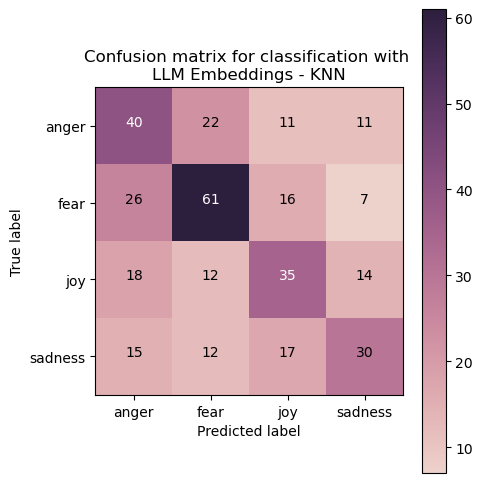

In [107]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

In [108]:
cm2

array([[40, 22, 11, 11],
       [26, 61, 16,  7],
       [18, 12, 35, 14],
       [15, 12, 17, 30]], dtype=int64)

Now let's also try to apply our **Neural Network** to these embeddings:

In [92]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [93]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [94]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 2048)

In [95]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 2048)

In [96]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [97]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  2048
output_shape:  4


In [98]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2048)]            0         
                                                                 
 dense_3 (Dense)             (None, 64)                131136    
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [99]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.2628 - accuracy: 0.4406 - val_loss: 1.0611 - val_accuracy: 0.5821
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9451 - accuracy: 0.6070 - val_loss: 1.0556 - val_accuracy: 0.5360
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.7903 - accuracy: 0.6814 - val_loss: 0.9896 - val_accuracy: 0.6167
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.7307 - val_loss: 1.0611 - val_accuracy: 0.5879
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7609 - val_loss: 1.0326 - val_accuracy: 0.6052
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7968 - val_loss: 1.0879 - val_accuracy: 0.5821
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.8240 - val_loss: 1.3003 - val_accuracy: 0.5620
Epoch 

In [100]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 1ms/step


array([[9.9984074e-01, 7.6398101e-06, 1.4361241e-04, 7.9871115e-06],
       [9.8806667e-01, 9.5940108e-05, 1.4159529e-04, 1.1695759e-02],
       [6.2980741e-04, 6.7748442e-02, 2.9741414e-04, 9.3132424e-01],
       [7.8480846e-01, 1.0857026e-03, 1.0622782e-04, 2.1399964e-01],
       [3.2368461e-03, 3.9145091e-01, 7.9850928e-04, 6.0451376e-01]],
      dtype=float32)

In [101]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'sadness', 'anger', 'sadness'], dtype=object)

In [102]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.57


In [103]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.440631,1.262817,0.582133,1.061149
1,1,0.606975,0.945131,0.536023,1.055578
2,2,0.681428,0.790274,0.616715,0.989612
3,3,0.730695,0.674572,0.587896,1.061055
4,4,0.760864,0.612884,0.605187,1.032626
5,5,0.796845,0.521716,0.582133,1.087902
6,6,0.823969,0.475252,0.561960,1.300328
7,7,0.844727,0.425204,0.590778,1.280181
8,8,0.871298,0.358412,0.602305,1.238058
9,9,0.885414,0.311403,0.576369,1.558389


In [104]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.47      0.69      0.56        84
        fear       0.67      0.61      0.64       110
         joy       0.63      0.53      0.58        79
     sadness       0.54      0.41      0.46        74

    accuracy                           0.57       347
   macro avg       0.58      0.56      0.56       347
weighted avg       0.58      0.57      0.57       347



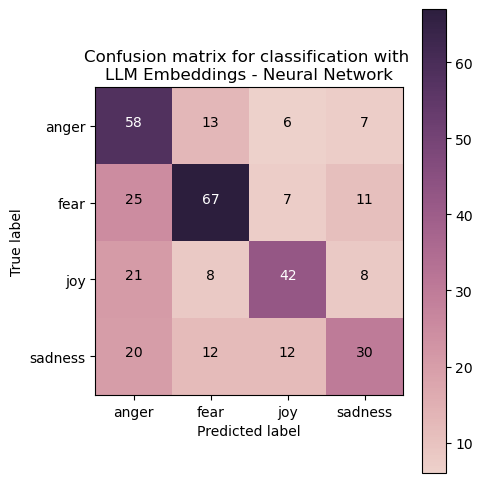

In [105]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

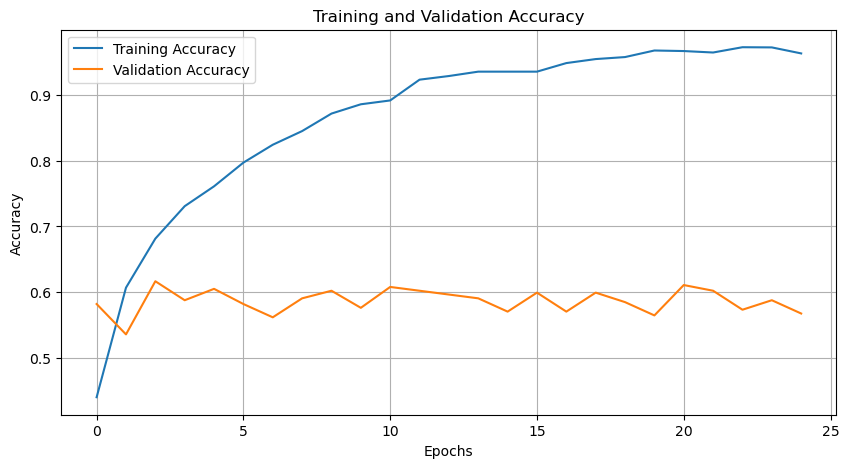

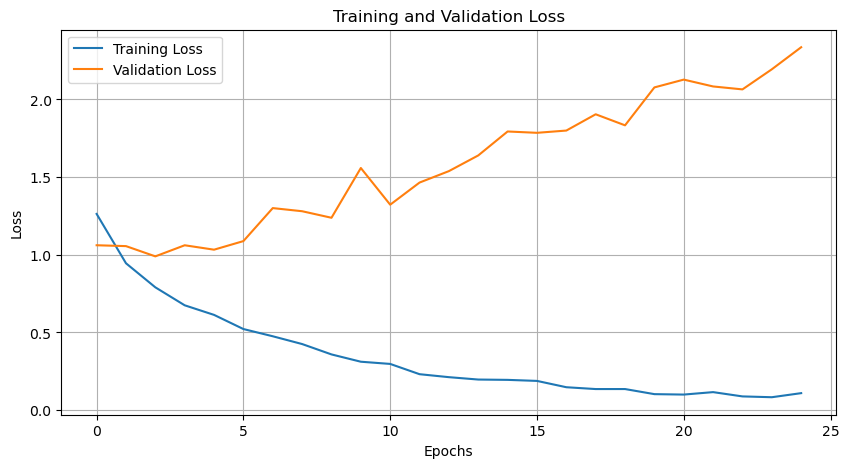

"Previously in Exercise 6, we achieved a testing accuracy of 0.69. However, this time, after including the embedding vectors,\nthe accuracy decreased to KNN: 48% and NN: 57%. This is a sign that the models we constructed did not capture the information\nfrom the Llama model effectively and caused some overfitting problems. We should consider trying other techniques to help \nthe models fit better, such as regularizations, CNNs, dropout, etc.\n\nCompared to KNN, the NN outperforms the KNN model in terms of accuracy. \nThis indicates that the NN's deeper architecture captures more relationships in the data, \nwhereas KNN struggles to generalize well."

In [110]:
# Answer here
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

"""Previously in Exercise 6, we achieved a testing accuracy of 0.69. However, this time, after including the embedding vectors,
the accuracy decreased to KNN: 48% and NN: 57%. This is a sign that the models we constructed did not capture the information
from the Llama model effectively and caused some overfitting problems. We should consider trying other techniques to help 
the models fit better, such as regularizations, CNNs, dropout, etc.

Compared to KNN, the NN outperforms the KNN model in terms of accuracy. 
This indicates that the NN's deeper architecture captures more relationships in the data, 
whereas KNN struggles to generalize well."""

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [111]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2:1b"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: fury. Asking for reclassification.
Invalid response: fury. Asking for reclassification.
Invalid response: frightened. Asking for reclassification.
Invalid response: fright. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: sadness.. Asking for reclassification.
Accuracy: 36.25%
              precision    recall  f1-score   support

       anger       0.27      0.35      0.30        20
        fear       0.40      0.30      0.34        20
         joy       0.67      0.20      0.31        20
     sadness   

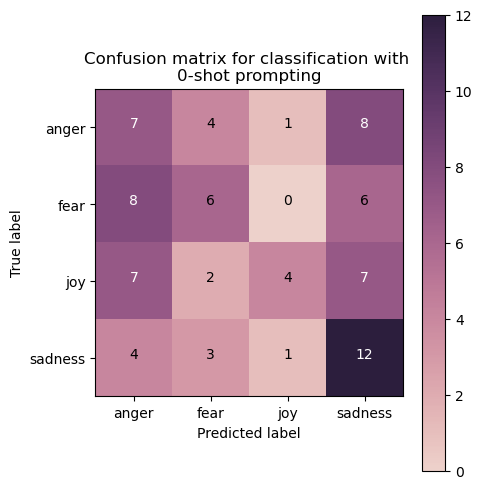

In [112]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Did we miss the fact that #BurkeRamsey swung &amp;hit his sister #JonBenet in the face with a golf club previously out of a fit of #anger?
Emotion: anger

Text: @JackAndAHat butter up the walls, nightmare
Emotion: fear

Text: @TheMandyMoore You are beyond wonderful.  Your singing prowess is phenomenal but damn... I'm just elated to watch you act again. #ThisIsUs 🤗
Emotion: joy

Text: @RevTrevK @Wolfman93011 @Daraidernation @EROCKhd Take 2k out of it the numbers on madden are low and have dropped and people are unhappy
Emotion: sadness


Invalid response: inevitable. Asking for reclassification.
Invalid response: relentless

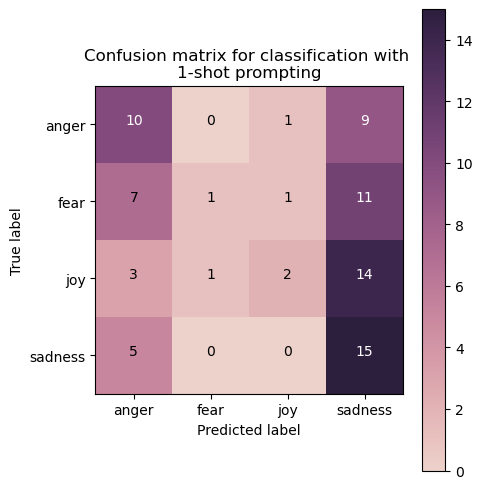

In [113]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

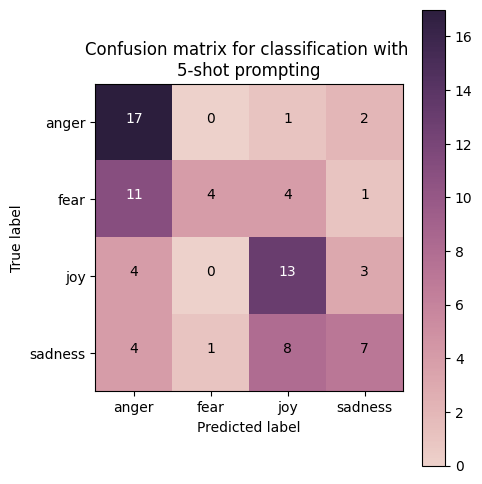

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
'''The zero-shot test achieved 36.25% accuracy, which is significantly lower than the accuracy achieved with the KNN (48%) and NN (57%) using Llama embeddings.'''
'''The accuracy achieved with one-shot prompting is 35.00%, which is slightly worse than zero-shot (36.25% in the previous test). This suggests that providing one example per category did not improve the model's ability to generalize.'''
'''After 5 examples provided, the model achieved 51.25% accuracy, it appears to have guided the model better in aligning its outputs with the predefined emotion categories.'''

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---